In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
        
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
                
    return arr

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    
    return X / np.expand_dims(l2, axis)

# отображение графика на первых count_record записях
def show_graph(y_predict, y_true, count_record):
    plt.figure(figsize = (16,5))
    plt.plot(y_predict[:count_record,1], 'r',label = 'Y new')
    plt.plot(y_true[:count_record,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.grid()
    plt.show()

# отображение метрики    
def get_accuracy(y_predict, y_true):
    result_error = y_true - y_predict
    error = np.mean(np.abs(result_error))
    
    return (1 - error) * 100

In [3]:
class IrisNN:
    def __init__(self, neuron_numb, learning_rate):
        np.random.seed(1)
        
        self.w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
        self.w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
        
        self.learning_rate = learning_rate
        self.errors = []
    
    # вычисление сигмоид функции
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    # вычисление производной от сигмоид функции
    @staticmethod
    def sigmoid_deriv(x):
        return x * (1 - x)
    
    def showError(self):
        # черчение диаграммы точности в зависимости от обучения
        plt.figure(figsize = (16,5))
        plt.plot(self.errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.grid()
        plt.show()
    
    # предсказание
    def predict(self, inputs):
        self.layers = []
        
        # прямое распространение(feed forward)
        layer1 = IrisNN.sigmoid(np.dot(inputs, self.w0))
        layer2 = IrisNN.sigmoid(np.dot(layer1, self.w1))
        
        self.layers.append(layer1)
        self.layers.append(layer2)
        
        return layer2
    
    # тренировка 
    def fit(self, training_inputs, training_outputs, training_iterations):
        for iteration in range(training_iterations):
            self.predict(training_inputs)

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y_train - self.layers[1]  
            # производная функции потерь = производная квадратичных потерь
            layer2_delta = layer2_error * IrisNN.sigmoid_deriv(self.layers[1])
            
            layer1_error = layer2_delta.dot(self.w1.T)
            layer1_delta = layer1_error * IrisNN.sigmoid_deriv(self.layers[0])
            
            # коррекция
            self.w1 += self.layers[0].T.dot(layer2_delta) * self.learning_rate
            self.w0 += training_inputs.T.dot(layer1_delta) * self.learning_rate
            
            # метрика модели
            error = np.mean(np.abs(layer2_error))
            self.errors.append(error)
            
            self.accuracy = (1 - error) * 100

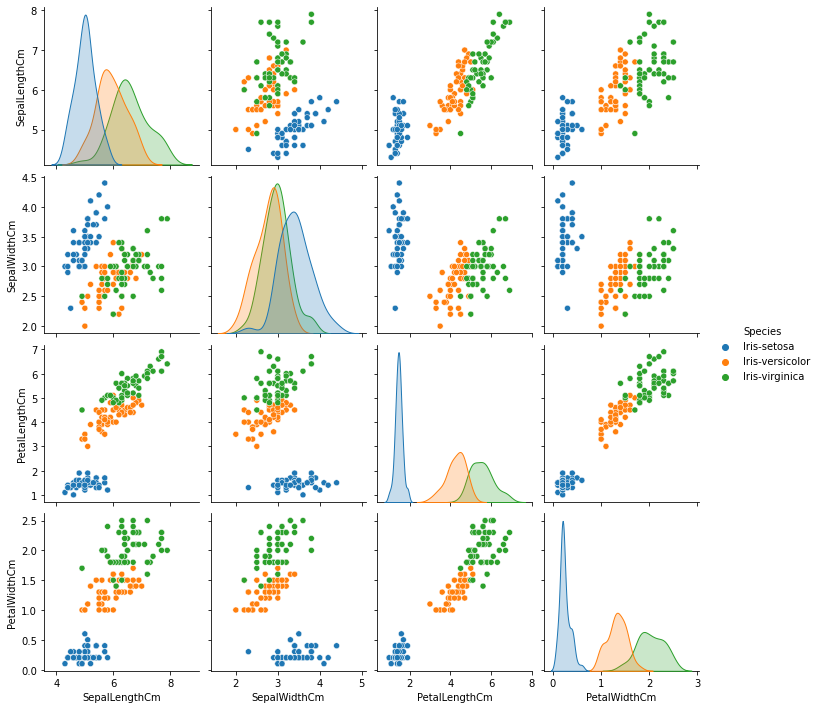

In [4]:
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("C:/Users/User/First/Нейронки/Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [5]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [6]:
# определим число нейронов скрытого слоя
neuron_numb = 2

# скорость обучения
learning_rate = 0.05

irisNN = IrisNN(neuron_numb, learning_rate)

irisNN.fit(X_train, y_train, 10000)

In [7]:
y_predict = irisNN.predict(X_train)
y_predict

array([[1.08334956e-01, 7.04875856e-02, 4.04635659e-01],
       [7.90735354e-03, 2.44075236e-01, 3.69183746e-01],
       [2.01313104e-06, 8.81163271e-01, 2.52867375e-01],
       [9.54604720e-01, 1.30792571e-14, 1.13930659e-01],
       [1.40195424e-04, 6.51070844e-01, 3.12955821e-01],
       [3.61230400e-10, 9.90036836e-01, 1.54143642e-01],
       [1.19130739e-01, 6.58900971e-02, 4.05782503e-01],
       [9.55848288e-01, 9.64631829e-15, 1.11974063e-01],
       [4.92013749e-01, 2.16384496e-03, 3.89036777e-01],
       [1.12075744e-09, 9.86861769e-01, 1.65653044e-01],
       [9.57997345e-01, 5.58479436e-15, 1.08534861e-01],
       [1.61406082e-07, 9.48220896e-01, 2.22023768e-01],
       [7.50725634e-02, 6.16042987e-02, 3.93039418e-01],
       [9.53922593e-01, 1.53949426e-14, 1.14989900e-01],
       [3.68375808e-04, 5.30596490e-01, 3.24675303e-01],
       [1.31906769e-08, 9.74811390e-01, 1.92468982e-01],
       [1.15564582e-07, 9.45612965e-01, 2.16016723e-01],
       [9.58419438e-01, 5.00247

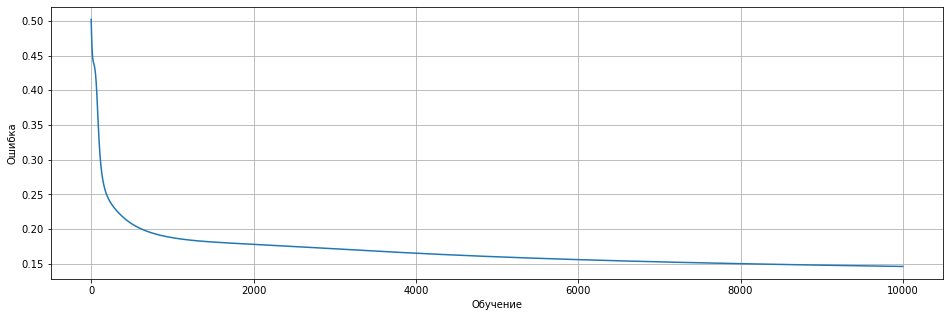

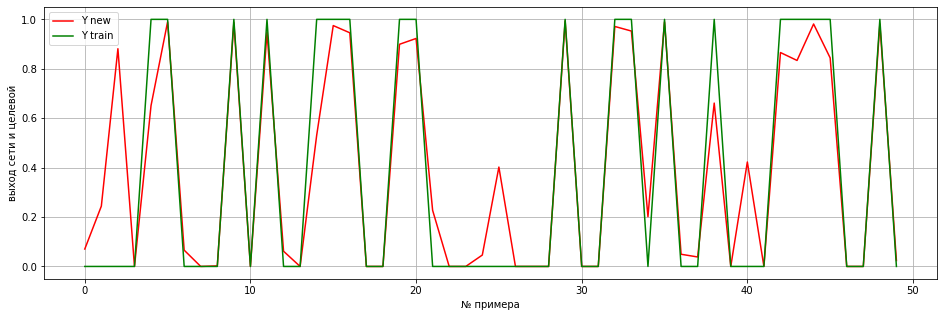

Аккуратность нейронной сети 85.38%


In [8]:
irisNN.showError()

show_graph(y_predict, y_train, 50)
accuracy = get_accuracy(y_predict, y_train)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

In [9]:
y_predict = irisNN.predict(X_test)
y_predict

array([[2.35837368e-06, 8.72073692e-01, 2.54513786e-01],
       [9.57174662e-01, 6.90553760e-15, 1.09859492e-01],
       [9.53277666e-01, 1.79183239e-14, 1.15983665e-01],
       [2.07374208e-02, 1.78478874e-01, 3.83892737e-01],
       [9.55848288e-01, 9.64631829e-15, 1.11974063e-01],
       [5.58950159e-03, 3.96834508e-01, 3.73686067e-01],
       [9.53382933e-01, 1.74890514e-14, 1.15824763e-01],
       [1.03002070e-07, 9.55304238e-01, 2.16745843e-01],
       [9.50826946e-01, 3.14518407e-14, 1.19735919e-01],
       [9.54270037e-01, 1.41074357e-14, 1.14417140e-01],
       [1.64273733e-09, 9.85296310e-01, 1.69489992e-01],
       [9.51880718e-01, 2.46565073e-14, 1.18095339e-01],
       [1.14251093e-07, 9.50667588e-01, 2.17110757e-01],
       [9.55848288e-01, 9.64631829e-15, 1.11974063e-01],
       [5.93815876e-05, 7.72020889e-01, 3.05057801e-01],
       [1.68760524e-01, 4.35440255e-02, 4.07250826e-01],
       [3.19778633e-05, 7.50512839e-01, 2.91105355e-01],
       [1.16617572e-08, 9.70573

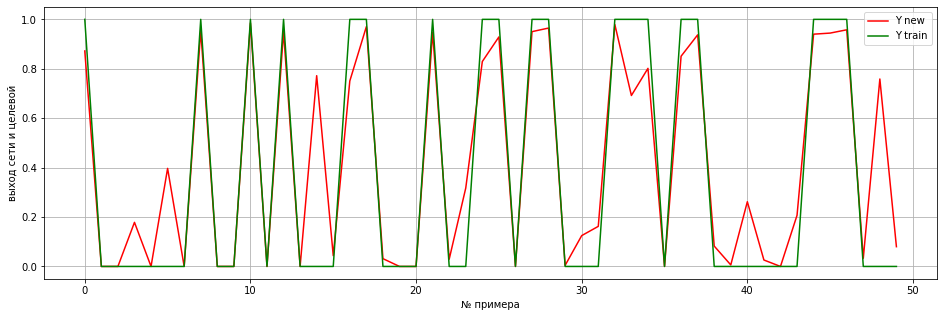

Аккуратность нейронной сети 83.36%


In [10]:
show_graph(y_predict, y_test, 50)
accuracy = get_accuracy(y_predict, y_test)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Весь процесс обучения и предсказания завернули в класс и написаны функции для отображения графика и метрики.
Теперь можно протестировать как будет проходить обучение на разных глобальных параметрах.

In [11]:
%%time

neuron_numbs = [2, 5, 10] 
learning_rates = [0.001, 0.01, 0.05, 0.1]
count_epoсhs = [1000, 5000, 10000, 20000]

best_accuracy = 0
best_param = {}

# сюда будем собирать аналитику качества по каждому параметру при одинаковых других параметрах 
analytics = {"neuron_numbs": {}, "learning_rates": {}, "count_epoсhs": {}}

for neuron_numb in neuron_numbs:
    for learning_rate in learning_rates:
        for count_epoсh in count_epoсhs:
            print("//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//")
            print(f"Количество нейронов на внутренем слое: {neuron_numb}")
            print(f"Точность обучения: {learning_rate}")
            print(f"Количество эпох: {count_epoсh}")
            print()
            irisNN = IrisNN(neuron_numb, learning_rate)
            irisNN.fit(X_train, y_train, count_epoсh)
            
            #смотреть качество будем на тестовом наборе
            y_predict = irisNN.predict(X_test)
            accuracy = get_accuracy(y_predict, y_test)
            print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
            print("//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//")
            
            if best_accuracy < accuracy:
                best_accuracy = accuracy
                best_param["neuron_numb"] = neuron_numb
                best_param["learning_rate"] = learning_rate
                best_param["count_epoсh"] = count_epoсh
            
            # собираем аналитику
            key_for_neuron_numb = f"{learning_rate}-{count_epoсh}"
            key_for_learning_rate = f"{neuron_numb}-{count_epoсh}"
            key_for_count_epoch = f"{learning_rate}-{neuron_numb}"
            
            if key_for_neuron_numb not in analytics["neuron_numbs"]:
                analytics["neuron_numbs"][key_for_neuron_numb] = {
                    "params": {"learning_rate": learning_rate, "count_epoсh": count_epoсh},
                    "accuracies": []
                }
            
            if key_for_learning_rate not in analytics["learning_rates"]:
                analytics["learning_rates"][key_for_learning_rate] = {
                    "params": {"neuron_numb": neuron_numb, "count_epoсh": count_epoсh},
                    "accuracies": []
                }
                
            if key_for_count_epoch not in analytics["count_epoсhs"]:
                analytics["count_epoсhs"][key_for_count_epoch] = {
                    "params": {"learning_rate": learning_rate, "neuron_numb": neuron_numb},
                    "accuracies": []
                }
            
            analytics["neuron_numbs"][key_for_neuron_numb]["accuracies"].append(accuracy)
            analytics["learning_rates"][key_for_learning_rate]["accuracies"].append(accuracy)
            analytics["count_epoсhs"][key_for_count_epoch]["accuracies"].append(accuracy)

//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
Количество нейронов на внутренем слое: 2
Точность обучения: 0.001
Количество эпох: 1000

Аккуратность нейронной сети 54.63%
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
Количество нейронов на внутренем слое: 2
Точность обучения: 0.001
Количество эпох: 5000

Аккуратность нейронной сети 65.58%
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
Количество нейронов на внутренем слое: 2
Точность обучения: 0.001
Количество эпох: 10000

Аккуратность нейронной сети 72.3%
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
Количество нейронов на внутренем слое: 2
Точность обучения: 0.001
Количество эпох: 20000

Аккуратность нейронной сети 75.67%
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
Количество нейронов на внутренем слое: 2
Точность

Аккуратность нейронной сети 89.75%
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
Количество нейронов на внутренем слое: 10
Точность обучения: 0.01
Количество эпох: 10000

Аккуратность нейронной сети 93.82%
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
Количество нейронов на внутренем слое: 10
Точность обучения: 0.01
Количество эпох: 20000

Аккуратность нейронной сети 95.33%
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
Количество нейронов на внутренем слое: 10
Точность обучения: 0.05
Количество эпох: 1000

Аккуратность нейронной сети 89.75%
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
Количество нейронов на внутренем слое: 10
Точность обучения: 0.05
Количество эпох: 5000

Аккуратность нейронной сети 95.63%
//~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~//
//~~~~~~~~~~

In [12]:
analytics

{'neuron_numbs': {'0.001-1000': {'params': {'learning_rate': 0.001,
    'count_epoсh': 1000},
   'accuracies': [54.62539697040412, 55.97794058259762, 56.93560211638717]},
  '0.001-5000': {'params': {'learning_rate': 0.001, 'count_epoсh': 5000},
   'accuracies': [65.5828886920387, 69.14863492763808, 70.45927898165975]},
  '0.001-10000': {'params': {'learning_rate': 0.001, 'count_epoсh': 10000},
   'accuracies': [72.29781820556775, 73.69020054301257, 74.50362821821987]},
  '0.001-20000': {'params': {'learning_rate': 0.001, 'count_epoсh': 20000},
   'accuracies': [75.67486863140907, 77.37535741695612, 78.37385240571189]},
  '0.01-1000': {'params': {'learning_rate': 0.01, 'count_epoсh': 1000},
   'accuracies': [72.29552283842916, 73.68942629581095, 74.50466052898803]},
  '0.01-5000': {'params': {'learning_rate': 0.01, 'count_epoсh': 5000},
   'accuracies': [78.965561858026, 88.33215858209682, 89.74881363291645]},
  '0.01-10000': {'params': {'learning_rate': 0.01, 'count_epoсh': 10000},
   

In [13]:
def show_graph_by_accuracy(accaracies, x_params, x_label, title):
    plt.figure(figsize = (8,5))
    plt.plot(x_params, accaracies)
    plt.xlabel(x_label)
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.grid()
    plt.show()

**Расмотрим как меняется качество в зависимости от количества нейронов на скрытом слое**

Каждый график показывает это изминение при разных мараметрах обучения и количества эпох.

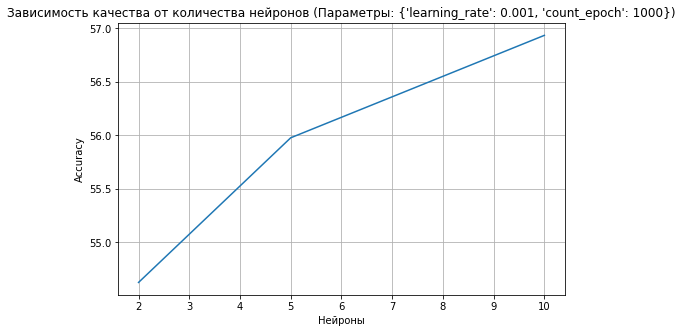

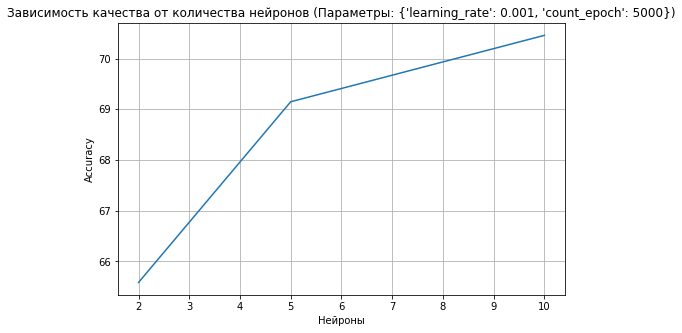

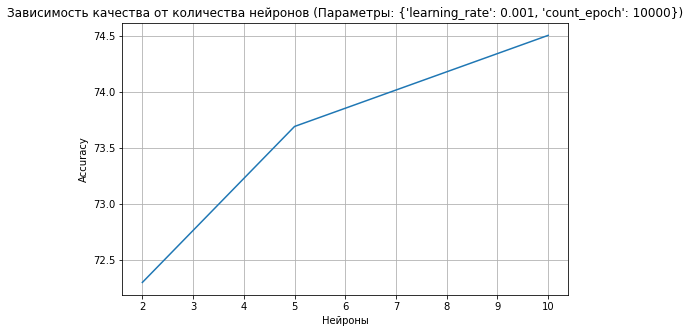

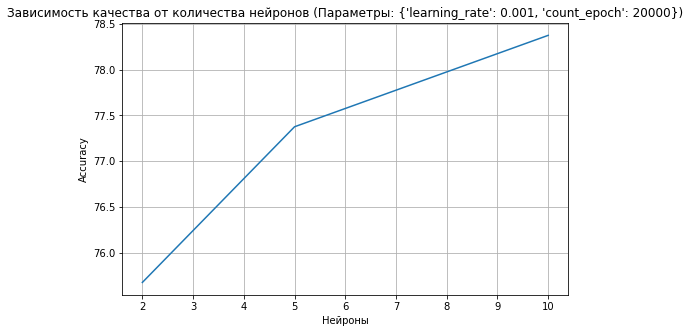

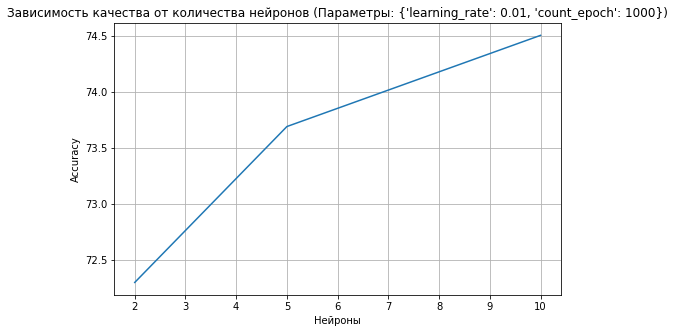

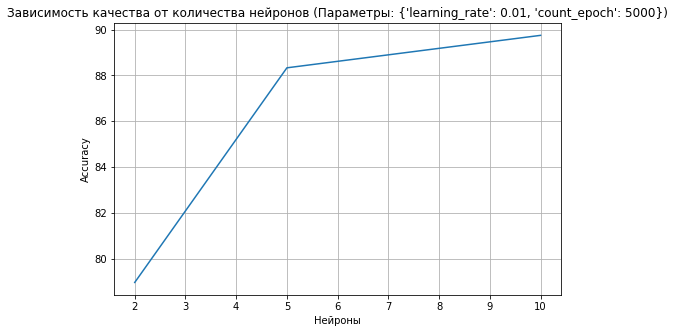

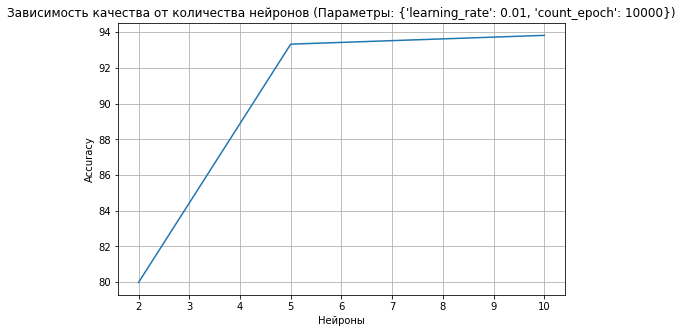

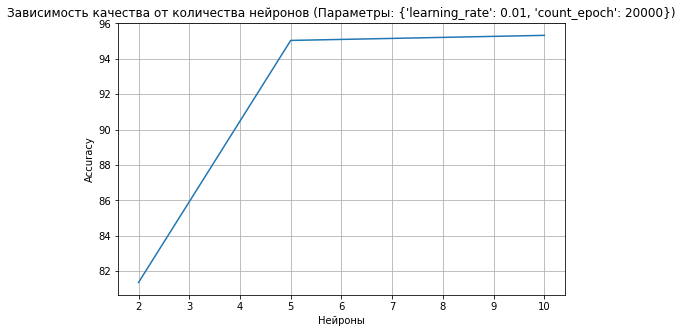

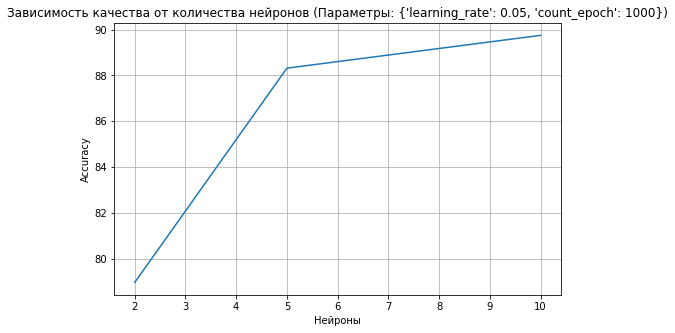

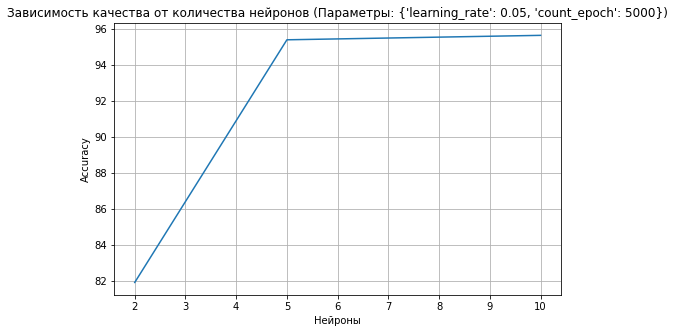

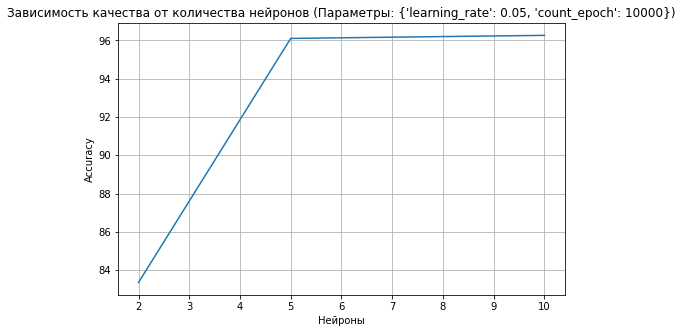

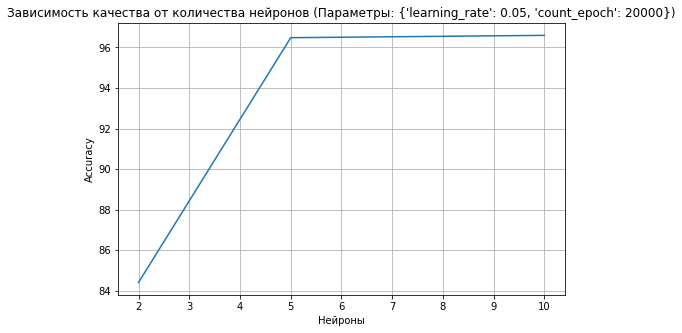

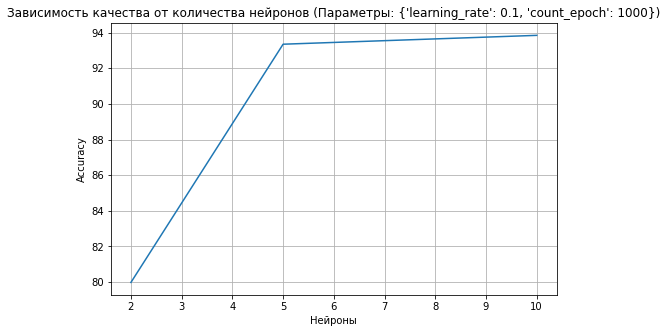

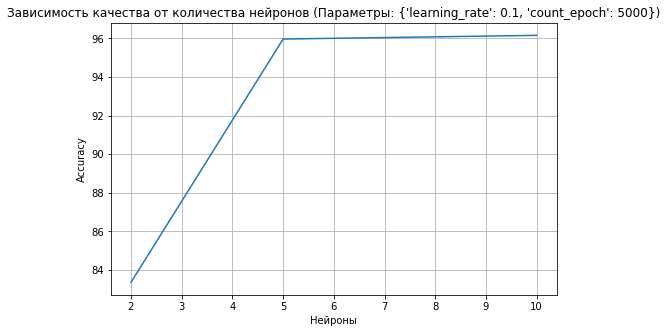

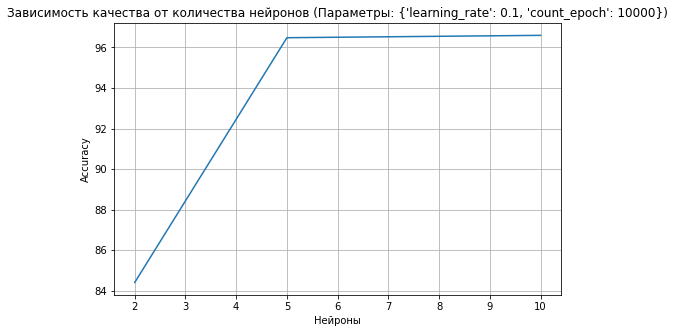

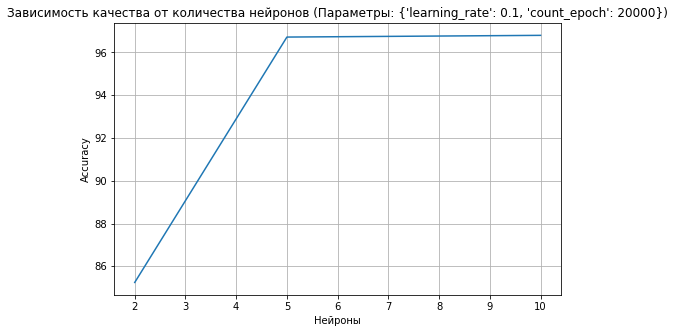

In [14]:
for key in analytics["neuron_numbs"]:
    neuron_numb_analitic = analytics["neuron_numbs"][key]
    accuracies = neuron_numb_analitic["accuracies"]
    params = neuron_numb_analitic["params"]
    
    show_graph_by_accuracy(
        accuracies, 
        neuron_numbs, 
        "Нейроны", 
        f"Зависимость качества от количества нейронов (Параметры: {params})"
    )

Анализируя графики можно увидеть, что в основном, чем больше нейронов - тем качество выше, но в некоторых случаях, оно вырастает незначительно.

**Теперь рассмотрим, как меняется качество, в зависимости от точности обучения**

Каждый график показывает это изменение при разных параметрах количества нейронов и количества эпох.

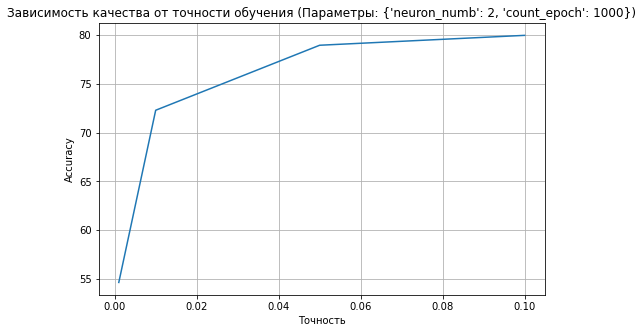

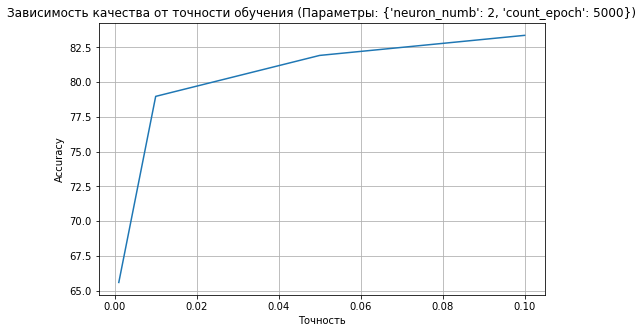

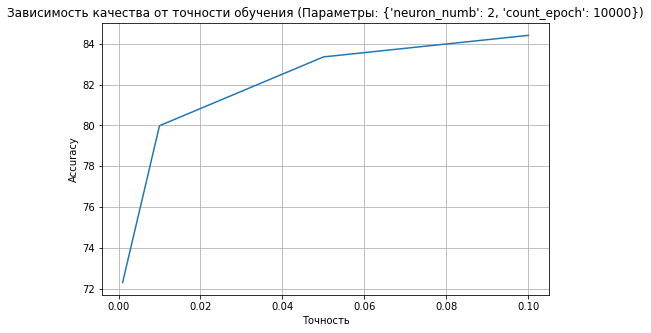

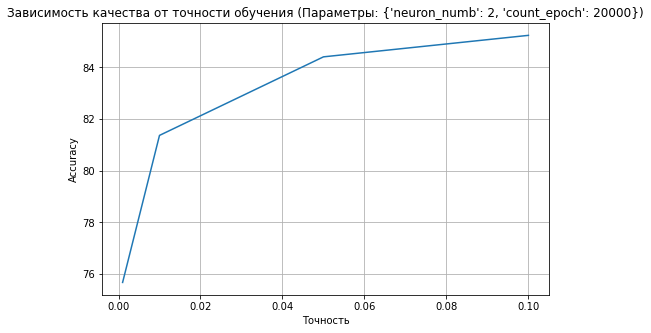

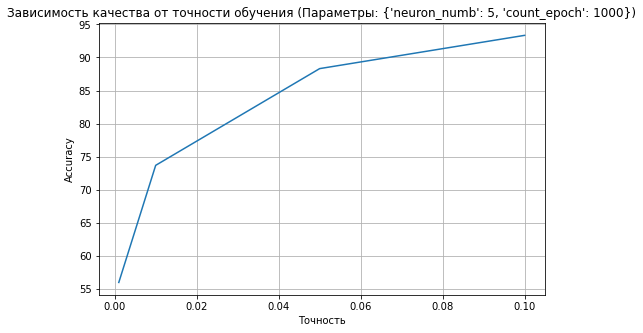

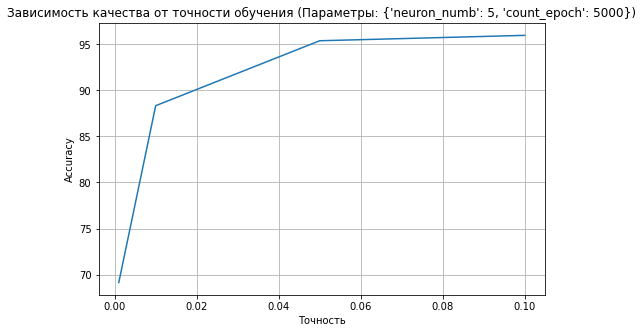

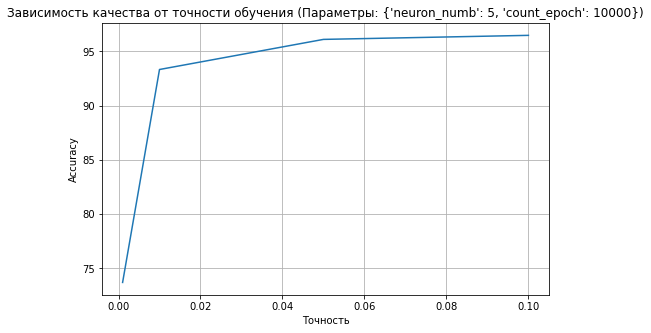

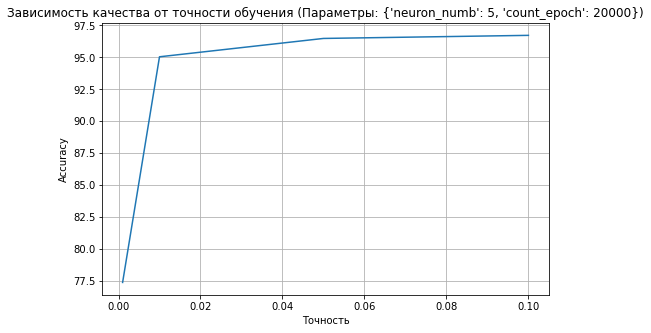

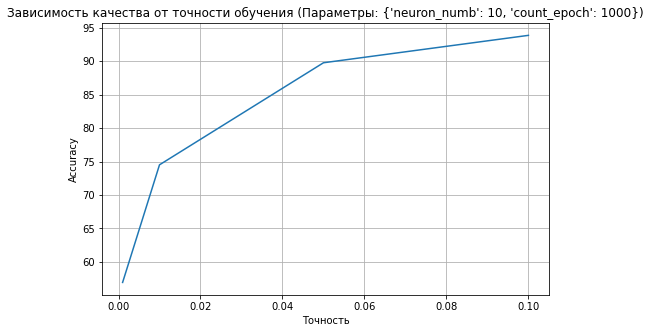

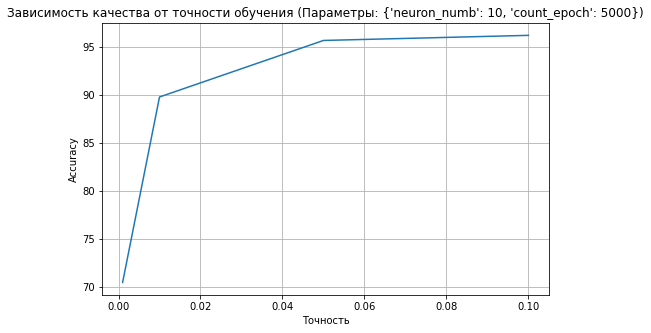

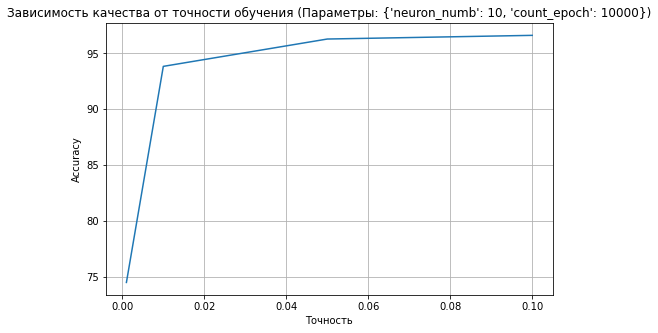

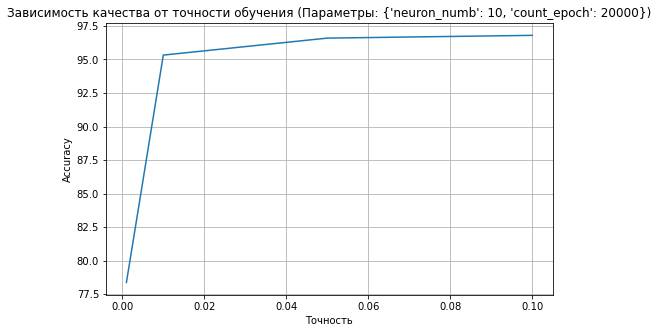

In [15]:
for key in analytics["learning_rates"]:
    learning_rate_analitic = analytics["learning_rates"][key]
    accuracies = learning_rate_analitic["accuracies"]
    params = learning_rate_analitic["params"]
    
    show_graph_by_accuracy(
        accuracies, 
        learning_rates, 
        "Точность", 
        f"Зависимость качества от точности обучения (Параметры: {params})"
    )

Видим аналогичную картину, как и в предыдущем варианте, только тут при уменьшении точности в некоторых случаях резко возрастает качество обучения, в остальных вариантах уменьшения точности особого прироста не дает.

**Теперь рассмотрим как меняется качество в зависимости от количества эпох**

Каждый график показывает это изминение при разных параметрах количества нейронов и точности обучения.

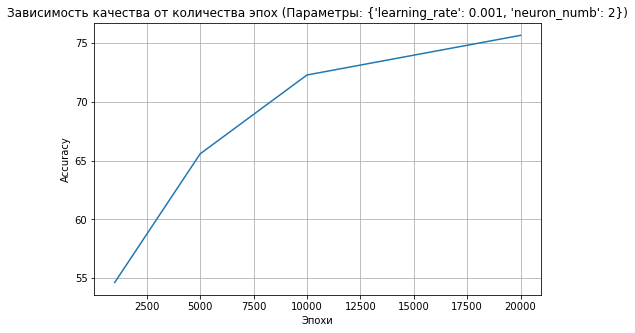

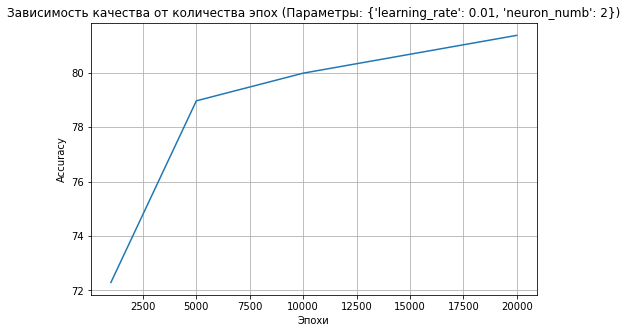

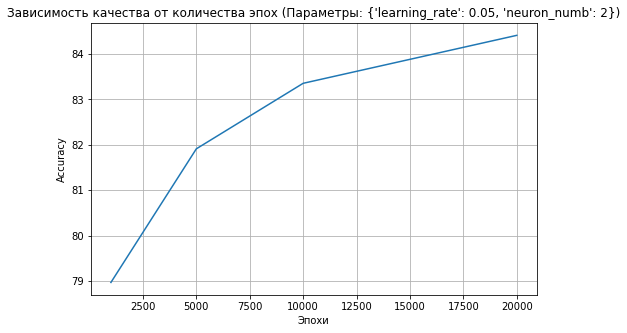

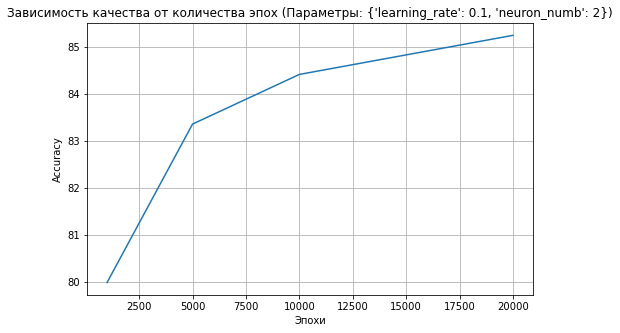

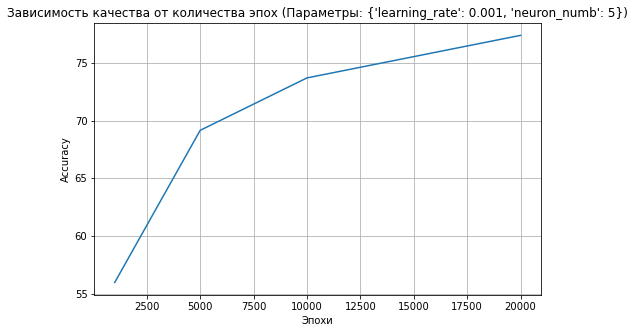

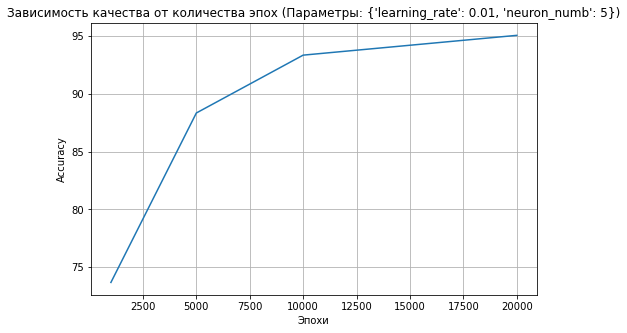

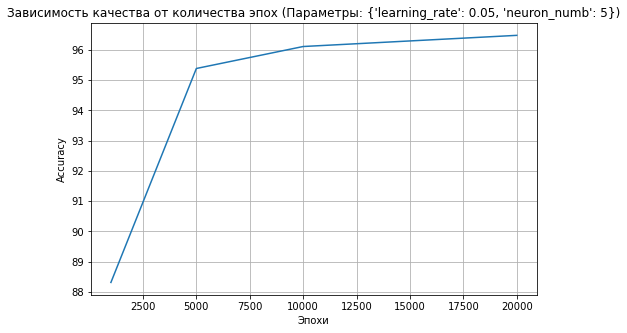

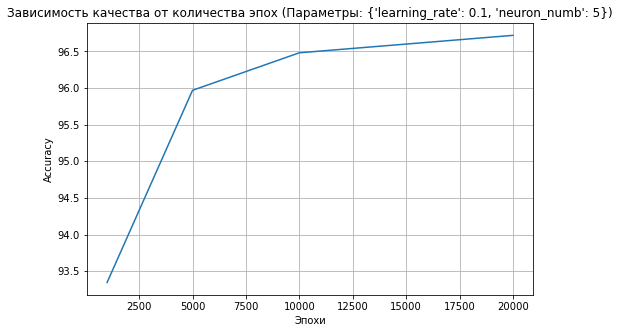

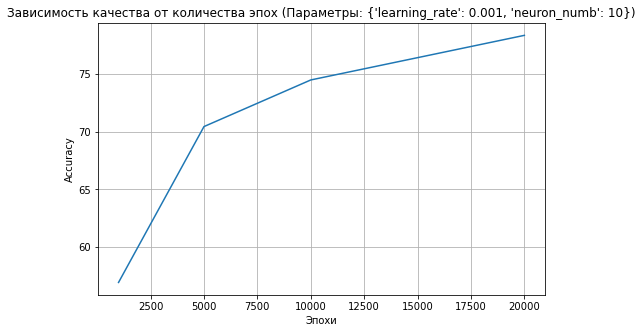

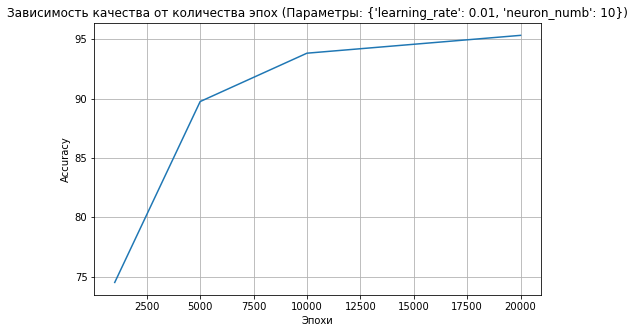

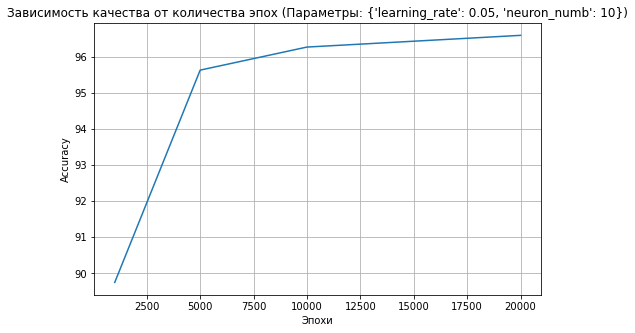

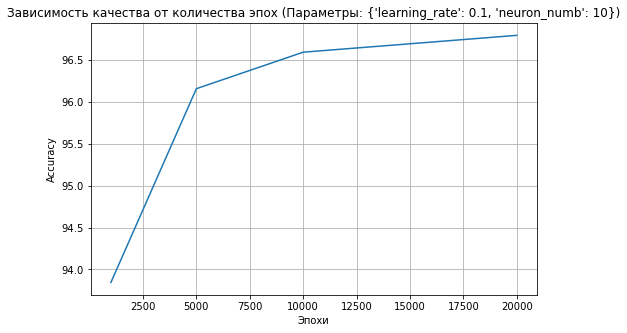

In [16]:
for key in analytics["count_epoсhs"]:
    count_epoсh_analitic = analytics["count_epoсhs"][key]
    accuracies = count_epoсh_analitic["accuracies"]
    params = count_epoсh_analitic["params"]
    
    show_graph_by_accuracy(
        accuracies, 
        count_epoсhs, 
        "Эпохи", 
        f"Зависимость качества от количества эпох (Параметры: {params})"
    )

В основном, чем больше эпох, тем лучше качество,  интесивность возрастания качества зависит от остальных параметров.

In [17]:
print(f"Лучшая метрика: {best_accuracy}")
print(f"Лучшие параметры: {best_param}")

Лучшая метрика: 96.797778299628
Лучшие параметры: {'neuron_numb': 10, 'learning_rate': 0.1, 'count_epoсh': 20000}
